In [2]:
# import libraries & modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import pickle

In [3]:
# Data ingestion

convertTO_csv_file = pd.read_csv(r'G:\household_power_consumption.txt',delimiter = ';') # convert text to csv
convertTO_csv_file.to_csv(r'G:\household_power_consumption.csv', index=None) # save csv file to my local

C:\Users\hp\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [79]:
# select only 100000 random data

df = convertTO_csv_file.sample(n = 100000) 
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1257652,8/5/2009,02:16:00,0.338,0.094,242.710,1.400,0.000,1.000,1.0
1698231,10/3/2010,01:15:00,0.384,0.112,244.250,1.600,0.000,0.000,1.0
228414,24/5/2007,08:18:00,3.524,0.154,231.390,15.200,36.000,0.000,17.0
1067616,27/12/2008,03:00:00,2.534,0.098,244.400,10.200,0.000,0.000,18.0
768895,2/6/2008,16:19:00,0.492,0.000,236.810,2.000,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
834989,18/7/2008,13:53:00,0.602,0.112,240.000,2.400,0.000,0.000,1.0
740687,14/5/2008,02:11:00,0.244,0.104,243.980,1.000,0.000,0.000,1.0
1877254,12/7/2010,08:58:00,0.350,0.216,239.970,1.600,0.000,0.000,0.0
1267333,14/5/2009,19:37:00,2.732,0.344,239.170,11.400,0.000,0.000,18.0


In [80]:
# EDA & Preprocessing

df.describe()

,Sub_metering_3
count,98805.000000
mean,6.460240
std,8.432581
min,0.000000
25%,0.000000
50%,1.000000
75%,17.000000
max,31.000000


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 1257652 to 1970553
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   100000 non-null  object 
 1   Time                   100000 non-null  object 
 2   Global_active_power    100000 non-null  object 
 3   Global_reactive_power  100000 non-null  object 
 4   Voltage                100000 non-null  object 
 5   Global_intensity       100000 non-null  object 
 6   Sub_metering_1         100000 non-null  object 
 7   Sub_metering_2         100000 non-null  object 
 8   Sub_metering_3         98805 non-null   float64
dtypes: float64(1), object(8)
memory usage: 7.6+ MB


In [82]:
pf = ProfileReport(df)
pf.to_widgets()

In [83]:
df2 = df.drop(['Date','Time'], axis=1)

There is too much handling, we need to do
1. Missing value
2. Changing data type
3. handle ? value
4. Drop unrelevant col

In [84]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1257652,8/5/2009,02:16:00,0.338,0.094,242.710,1.400,0.000,1.000,1.0
1698231,10/3/2010,01:15:00,0.384,0.112,244.250,1.600,0.000,0.000,1.0
228414,24/5/2007,08:18:00,3.524,0.154,231.390,15.200,36.000,0.000,17.0
1067616,27/12/2008,03:00:00,2.534,0.098,244.400,10.200,0.000,0.000,18.0
768895,2/6/2008,16:19:00,0.492,0.000,236.810,2.000,0.000,0.000,1.0
...,...,...,...,...,...,...,...,...,...
834989,18/7/2008,13:53:00,0.602,0.112,240.000,2.400,0.000,0.000,1.0
740687,14/5/2008,02:11:00,0.244,0.104,243.980,1.000,0.000,0.000,1.0
1877254,12/7/2010,08:58:00,0.350,0.216,239.970,1.600,0.000,0.000,0.0
1267333,14/5/2009,19:37:00,2.732,0.344,239.170,11.400,0.000,0.000,18.0


In [85]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1257652,0.338,0.094,242.710,1.400,0.000,1.000,1.0
1698231,0.384,0.112,244.250,1.600,0.000,0.000,1.0
228414,3.524,0.154,231.390,15.200,36.000,0.000,17.0
1067616,2.534,0.098,244.400,10.200,0.000,0.000,18.0
768895,0.492,0.000,236.810,2.000,0.000,0.000,1.0
...,...,...,...,...,...,...,...
834989,0.602,0.112,240.000,2.400,0.000,0.000,1.0
740687,0.244,0.104,243.980,1.000,0.000,0.000,1.0
1877254,0.350,0.216,239.970,1.600,0.000,0.000,0.0
1267333,2.732,0.344,239.170,11.400,0.000,0.000,18.0


Need to Identify more for missing value with rest of the features. 

In [86]:
unusedValue = {}

In [87]:
count = 0
# here we find how may '?' values present in each feature

#'Global_active_power': ,'Global_reactive_power':,'Voltage','Global_intensity':,'Sub_metering_1':,'Sub_metering_2':,'Sub_metering_3'}

for val in df2:
    count=0
    for val2 in df2[val]:
        if val2 == '?':
            count+=1
    unusedValue.update({val: count})

In [88]:
unusedValue

{'Global_active_power': 1195,
 'Global_reactive_power': 1195,
 'Voltage': 1195,
 'Global_intensity': 1195,
 'Sub_metering_1': 1195,
 'Sub_metering_2': 1195,
 'Sub_metering_3': 0}

Here we see very clearly that all of the features having '?' value equal to 1320 accept last one which have missing values
and now I have two option either I replace all '?' value with mean value for respected feature's mean or 
I simply remove it from my df.
I Choose option 2, simply remove it from my df, because for each row(where  '?' data present) the data will be same i.e '?'
and replace with mean is not good option as per my understanding.

In [89]:
df2['Sub_metering_3'].isna().sum()


1195

In [90]:
print(df2[df2['Sub_metering_1']== '?'].index.values)

[1310291  190942 1986170 ... 1619664 1617574 1987546]


In [91]:
indexList=[]
for val in df2:
    indexList.append(df2[df2[val]== '?'].index.values)
    break
for iList in indexList[0]:
    df2.drop([iList],axis=0, inplace=True)


In [92]:
unusedValue1 = {}
count = 0
# here we find how many '?' values present in each feature

#'Global_active_power': ,'Global_reactive_power':,'Voltage','Global_intensity':,'Sub_metering_1':,'Sub_metering_2':,'Sub_metering_3'}

for val in df2:
    count=0
    for val2 in df2[val]:
        if val2 == '?':
            count+=1
    unusedValue1.update({val: count})

In [93]:
unusedValue1

{'Global_active_power': 0,
 'Global_reactive_power': 0,
 'Voltage': 0,
 'Global_intensity': 0,
 'Sub_metering_1': 0,
 'Sub_metering_2': 0,
 'Sub_metering_3': 0}

In [94]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1257652,0.338,0.094,242.710,1.400,0.000,1.000,1.0
1698231,0.384,0.112,244.250,1.600,0.000,0.000,1.0
228414,3.524,0.154,231.390,15.200,36.000,0.000,17.0
1067616,2.534,0.098,244.400,10.200,0.000,0.000,18.0
768895,0.492,0.000,236.810,2.000,0.000,0.000,1.0
...,...,...,...,...,...,...,...
834989,0.602,0.112,240.000,2.400,0.000,0.000,1.0
740687,0.244,0.104,243.980,1.000,0.000,0.000,1.0
1877254,0.350,0.216,239.970,1.600,0.000,0.000,0.0
1267333,2.732,0.344,239.170,11.400,0.000,0.000,18.0


In [95]:
for val in df2:
    strCount=0 
    intCount=0 
    floatCount=0
    for val2 in df2[val]:
        if type(val2) == str:
            strCount+=1
        elif type(val2) == int:
            intCount+=1
        else:
            floatCount+=1
    print('strType = ',strCount,'intType = ',intCount,'floatType = ',floatCount,'-->',val)

strType =  96745 intType =  0 floatType =  2060 --> Global_active_power
strType =  96745 intType =  0 floatType =  2060 --> Global_reactive_power
strType =  96745 intType =  0 floatType =  2060 --> Voltage
strType =  96745 intType =  0 floatType =  2060 --> Global_intensity
strType =  96745 intType =  0 floatType =  2060 --> Sub_metering_1
strType =  96745 intType =  0 floatType =  2060 --> Sub_metering_2
strType =  0 intType =  0 floatType =  98805 --> Sub_metering_3


In [96]:
df3 = df2

In [97]:
# Changing the DATATYPE
df2[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']] = df2[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2','Sub_metering_3']].apply(pd.to_numeric)

In [98]:
for val in df2:
    strCount=0 
    intCount=0 
    floatCount=0
    for val2 in df2[val]:
        if type(val2) == str:
            strCount+=1
        elif type(val2) == int:
            intCount+=1
        else:
            floatCount+=1
    print('strType = ',strCount,'intType = ',intCount,'floatType = ',floatCount,'-->',val)

strType =  0 intType =  0 floatType =  98805 --> Global_active_power
strType =  0 intType =  0 floatType =  98805 --> Global_reactive_power
strType =  0 intType =  0 floatType =  98805 --> Voltage
strType =  0 intType =  0 floatType =  98805 --> Global_intensity
strType =  0 intType =  0 floatType =  98805 --> Sub_metering_1
strType =  0 intType =  0 floatType =  98805 --> Sub_metering_2
strType =  0 intType =  0 floatType =  98805 --> Sub_metering_3


In [99]:
df2.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [100]:
df2['Total_Energy_Consumption'] = df2['Sub_metering_1'] + df2['Sub_metering_2'] + df2['Sub_metering_3'] 

In [101]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_Energy_Consumption
1257652,0.338,0.094,242.71,1.4,0.0,1.0,1.0,2.0
1698231,0.384,0.112,244.25,1.6,0.0,0.0,1.0,1.0
228414,3.524,0.154,231.39,15.2,36.0,0.0,17.0,53.0
1067616,2.534,0.098,244.40,10.2,0.0,0.0,18.0,18.0
768895,0.492,0.000,236.81,2.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
834989,0.602,0.112,240.00,2.4,0.0,0.0,1.0,1.0
740687,0.244,0.104,243.98,1.0,0.0,0.0,1.0,1.0
1877254,0.350,0.216,239.97,1.6,0.0,0.0,0.0,0.0
1267333,2.732,0.344,239.17,11.4,0.0,0.0,18.0,18.0


In [102]:
df2 = df2.drop(['Sub_metering_1','Sub_metering_2','Sub_metering_3'], axis=1)

In [103]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Energy_Consumption
1257652,0.338,0.094,242.71,1.4,2.0
1698231,0.384,0.112,244.25,1.6,1.0
228414,3.524,0.154,231.39,15.2,53.0
1067616,2.534,0.098,244.40,10.2,18.0
768895,0.492,0.000,236.81,2.0,1.0
...,...,...,...,...,...
834989,0.602,0.112,240.00,2.4,1.0
740687,0.244,0.104,243.98,1.0,1.0
1877254,0.350,0.216,239.97,1.6,0.0
1267333,2.732,0.344,239.17,11.4,18.0


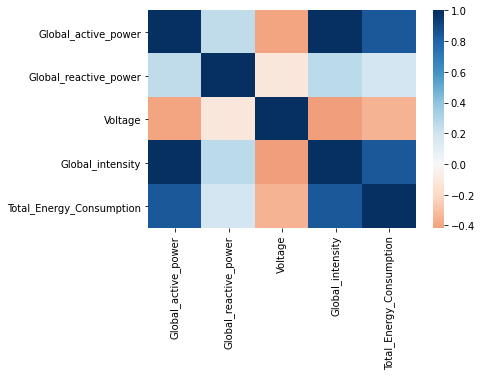

In [104]:
import seaborn as sns
sns.heatmap(df2.corr(), cmap='RdBu',center=0)
plt.show()

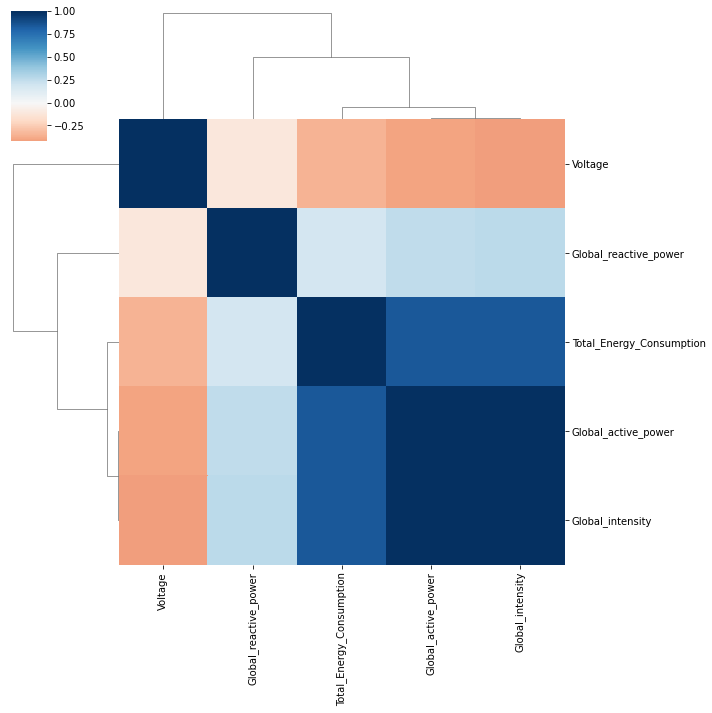

In [105]:
sns.clustermap(df2.corr(), cmap='RdBu',center=0)

In [106]:
df2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Energy_Consumption
1257652,0.338,0.094,242.71,1.4,2.0
1698231,0.384,0.112,244.25,1.6,1.0
228414,3.524,0.154,231.39,15.2,53.0
1067616,2.534,0.098,244.40,10.2,18.0
768895,0.492,0.000,236.81,2.0,1.0
...,...,...,...,...,...
834989,0.602,0.112,240.00,2.4,1.0
740687,0.244,0.104,243.98,1.0,1.0
1877254,0.350,0.216,239.97,1.6,0.0
1267333,2.732,0.344,239.17,11.4,18.0


In [107]:
# Create Independent and Dependent Variable

X=df2.drop("Total_Energy_Consumption",axis=1)
Y = df2['Total_Energy_Consumption']

In [108]:
X

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
1257652,0.338,0.094,242.71,1.4
1698231,0.384,0.112,244.25,1.6
228414,3.524,0.154,231.39,15.2
1067616,2.534,0.098,244.40,10.2
768895,0.492,0.000,236.81,2.0
...,...,...,...,...
834989,0.602,0.112,240.00,2.4
740687,0.244,0.104,243.98,1.0
1877254,0.350,0.216,239.97,1.6
1267333,2.732,0.344,239.17,11.4


In [109]:
Y.head()

1257652     2.0
1698231     1.0
228414     53.0
1067616    18.0
768895      1.0
Name: Total_Energy_Consumption, dtype: float64

In [110]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=50)

In [111]:
x_train

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
202406,3.060,0.180,234.88,13.0
1148555,0.240,0.046,242.75,1.0
1709209,1.756,0.000,243.30,7.2
1858059,0.780,0.324,241.34,3.4
188563,0.120,0.000,236.14,0.6
...,...,...,...,...
423019,3.870,0.366,233.89,16.6
206328,0.122,0.000,236.31,0.6
1356224,0.326,0.200,240.19,1.6
399339,0.280,0.226,240.64,1.4


In [112]:
x_test

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
1040060,1.544,0.046,242.65,6.4
2001566,1.570,0.054,243.74,6.4
424421,1.548,0.064,238.10,6.4
1480712,0.424,0.270,244.89,2.0
324938,0.102,0.000,236.17,0.4
...,...,...,...,...
1278794,0.276,0.000,242.94,1.2
644094,2.630,0.000,242.98,10.8
129968,1.082,0.098,240.71,4.4
1104075,1.266,0.054,239.94,5.2


In [113]:
y_train = np.array(y_train.ravel())

In [114]:
y_train

array([ 1.,  0., 20., ...,  1.,  1., 18.])

In [115]:
y_test 

1040060    19.0
2001566    18.0
424421     17.0
1480712     2.0
324938      0.0
           ... 
1278794     1.0
644094     39.0
129968      1.0
1104075    17.0
1817569    18.0
Name: Total_Energy_Consumption, Length: 29642, dtype: float64

In [116]:
# Data Standarization because all features ranging is different, so need to scaling into same scale

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_tf = scaler.fit_transform(x_train) 
# y_train_tf = scaler.fit_transform(y_train) 

In [117]:
x_train_tf

array([[ 1.83388499,  0.49588915, -1.83335103,  1.8545498 ],
       [-0.80663393, -0.68793172,  0.58870268, -0.81666528],
       [ 0.61287908, -1.09431799,  0.75796945,  0.56346251],
       ...,
       [-0.72610747,  0.67257883, -0.19915723, -0.68310453],
       [-0.76917976,  0.90227542, -0.06066623, -0.72762478],
       [ 0.98367535,  0.83159955, -1.41172288,  0.96414477]])

In [172]:
y_train_tf

array([[0., 0., 0., ..., 0., 0., 0.]])

In [173]:
y_train

array([ 1.,  0., 20., ...,  1.,  1., 18.])

In [118]:
type(y_train_tf)

numpy.ndarray

Model Creation

1. Linear Regression

In [119]:
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV, ElasticNet, ElasticNetCV,LinearRegression

In [120]:
linearModel = LinearRegression()

In [174]:
linearModel.fit(x_train_tf,y_train)

LinearRegression()

In [124]:
# Model Save : Linear Regression

pickle.dump(linearModel, open('ElectricConsumption_LinearModel.pickle','wb'))

In [125]:
L_model = pickle.load(open('ElectricConsumption_LinearModel.pickle','rb'))

In [175]:
linearModel.score(x_train_tf,y_train)

0.7203827216611616

In [127]:
L_model.score(x_train_tf,y_train)

0.7203827216611616

In [191]:
x_train_tf[10:20]

array([[-0.51261871, -0.59958688, -0.80851763, -0.46050327],
       [-0.69427143,  0.83159955,  0.39481528, -0.63858428],
       [-0.23733056,  2.28045494,  0.23170365, -0.19338176],
       [-0.7991431 , -0.61725585,  0.47175472, -0.81666528],
       [ 0.15968363, -1.09431799,  0.87799499,  0.11826   ],
       [ 0.65782408,  0.10717185, -0.71003514,  0.65250301],
       [-0.71861664, -1.09431799, -0.58693203, -0.68310453],
       [-0.65119913,  0.58423399,  0.50868565, -0.63858428],
       [-0.92274186, -1.09431799, -1.47327443, -0.90570579],
       [ 0.35444531,  0.3545374 , -1.53790356,  0.34086125]])

In [190]:
y_train[10:20]

array([ 2.,  1.,  0.,  1., 18., 19.,  0.,  2.,  0., 17.])

In [194]:
L_model.predict([[0.35444531,  0.3545374 , -1.53790356,  0.34086125]])

array([13.32457478])

In [183]:
x_test_tf=scaler.transform(x_test)

In [129]:
y_predict=linearModel.predict(x_test_tf)
y_predict

array([13.83431477, 14.2682463 , 14.21674804, ...,  9.26931628,
       11.22647888, 19.47313997])

In [130]:
y_test

1040060    19.0
2001566    18.0
424421     17.0
1480712     2.0
324938      0.0
           ... 
1278794     1.0
644094     39.0
129968      1.0
1104075    17.0
1817569    18.0
Name: Total_Energy_Consumption, Length: 29642, dtype: float64

In [131]:
# Evaluation of the model : R-square

from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.7175820253592958

In [132]:
# Data Standarization because all features ranging is different, so need to scaling into same scale

x_test_tf = scaler.fit_transform(x_test)

In [133]:
# Evaluation of the model : Adj. R-square

def adj_rSqr(x,y):
    r2 = linearModel.score(x,y)
    n = x.shape[0]  # Total number of samle
    p = x.shape[1]  # No. of columns
    adj_rSquare = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_rSquare

In [134]:
print(adj_rSqr(x_test_tf,y_test))

0.7170950608575893


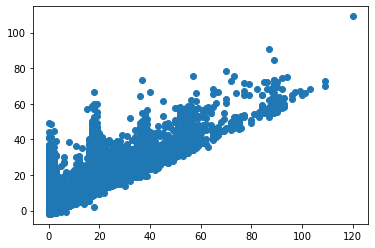

In [135]:
plt.scatter(y_test, y_predict)
plt.show()

2. Lasso Regression

In [136]:
lassocv  = LassoCV(alphas=None,max_iter=2000000,normalize=True)
lassocv.fit(x_train_tf,y_train)

LassoCV(max_iter=2000000, normalize=True)

In [137]:
lasso = Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train_tf,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1606595.6451917118, tolerance: 1178.473756942295
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=4.207119153647595e-05)

In [138]:
# Model Save : Lasso

pickle.dump(lasso, open('ElectricConsumption_LassoModel.pickle','wb'))

In [140]:
Lasso_model = pickle.load(open('ElectricConsumption_LassoModel.pickle','rb'))

In [139]:
# Evaluation of the model 

lasso.score(x_test_tf,y_test)

0.7171413563825504

In [164]:
# Evaluation of the model : Adj. R-square

def adj_rSqr(x,y):
    r2 = linearModel.score(x,y)
    n = x.shape[0]  # Total number of samle
    p = x.shape[1]  # No. of columns
    adj_rSquare = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_rSquare
print(adj_rSqr(x_test_tf,y_test))

0.7170950608575893


In [141]:
Lasso_model.score(x_test_tf,y_test)

0.7171413563825504

3. Ridge Regression

In [145]:
ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0), normalize=True, cv = 10)
ridgecv.fit(x_train_tf,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10, normalize=True)

In [146]:
ridge = Ridge(alpha=ridgecv.alpha_)
ridge.fit(x_train_tf,y_train)

Ridge(alpha=0.1)

In [154]:
# Model Save : Ridge

pickle.dump(ridge, open('ElectricConsumption_RidgeModel.pickle','wb'))

In [155]:
# Evaluation of the model

ridge.score(x_test_tf,y_test)

0.7171338833855758

In [165]:
# Evaluation of the model : Adj. R-square

def adj_rSqr(x,y):
    r2 = linearModel.score(x,y)
    n = x.shape[0]  # Total number of samle
    p = x.shape[1]  # No. of columns
    adj_rSquare = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_rSquare
print(adj_rSqr(x_test_tf,y_test))

0.7170950608575893


In [156]:
# Evaluation of the model

ridge.score(x_test_tf,y_test)

0.7171338833855758

4. Elastic Net

In [157]:
elastCV = ElasticNetCV(alphas=None,cv=10, normalize=True)
elastCV.fit(x_train_tf,y_train)

ElasticNetCV(cv=10, normalize=True)

In [158]:
elastinet = ElasticNet(alpha=elastCV.alpha_)
elastinet.fit(x_train_tf,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1602587.3605934689, tolerance: 1178.473756942295
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=8.414238307295191e-05)

In [159]:
# Model Save : Elastic Net

pickle.dump(elastinet, open('ElectricConsumption_ElasticNetModel.pickle','wb'))

In [160]:
# Evaluation of the model

elastinet.score(x_test_tf,y_test)

0.7171302908442213

In [166]:
# Evaluation of the model : Adj. R-square

def adj_rSqr(x,y):
    r2 = linearModel.score(x,y)
    n = x.shape[0]  # Total number of samle
    p = x.shape[1]  # No. of columns
    adj_rSquare = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_rSquare
print(adj_rSqr(x_test_tf,y_test))

0.7170950608575893


5. Support Vector Regression

In [73]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(x_train_tf,y_train)

SVR()

In [161]:
# Model Save : SVR

pickle.dump(svr, open('ElectricConsumption_SVRModel.pickle','wb'))

In [74]:
svr.score(x_train_tf,y_train)

0.7258860019148138

In [162]:
SVR_MODEL = pickle.load(open('ElectricConsumption_SVRModel.pickle','rb'))

In [163]:
SVR_MODEL.score(x_train_tf,y_train)

0.7224294110998317

In [167]:
# Evaluation of the model : Adj. R-square

def adj_rSqr(x,y):
    r2 = linearModel.score(x,y)
    n = x.shape[0]  # Total number of samle
    p = x.shape[1]  # No. of columns
    adj_rSquare = 1-(1-r2)*(n-1)/(n-p-1)
    return adj_rSquare
print(adj_rSqr(x_test_tf,y_test))

0.7170950608575893


In [169]:
!ls

Assignment_1.docx
Assignment_10.docx
Assignment_11.docx
Assignment_13.docx
Assignment_14.docx
Assignment_2.docx
Assignment_3.docx
Assignment_4.docx
Assignment_5.docx
Assignment_6.docx
Assignment_7.docx
Assignment_9.docx
ElectricConsumption_ElasticNetModel.pickle
ElectricConsumption_LassoModel.pickle
ElectricConsumption_LinearModel.pickle
ElectricConsumption_RidgeModel.pickle
ElectricConsumption_SVRModel.pickle
ML Assignment(Regression-Electric Consumption).ipynb
casandra
generally asked(ineuron class).txt
household_power_consumption.csv
ineuron_Notes for sql connect.txt
ineuron_Notes.txt
ineuron_numpy.txt
python advance
